# Cat Breed Classification Using Convolutional Neural Networks

Please refer to the report.pdf for a complete analysis and documentation

## Download the dataset

Download the Oxford-IIIT Pet dataset.

In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2024-09-21 15:35:22--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2024-09-21 15:35:23--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  31.8MB/s    in 25s     

2024-09-21 15:35:48 (30.8 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2024-09-21 15:35:49--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.r

## Extract the downloaded archives

Extract the dataset and place it at 'data' folder.

In [3]:
!mkdir data
!tar xvzf images.tar.gz -C data
!tar xvzf annotations.tar.gz -C data

Streaming output truncated to the last 5000 lines.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian

## Install the modules

Install a specific version of some modules to avoid unexpected behaviours. It may be necessary to restart the kernel after the installation is finished.

In [4]:
!pip install torch torchvision numpy pandas
!pip install numpy==1.26.4 pandas
!pip install pandas
!pip install matplotlib==3.9.2
!pip install tqdm==4.38.0
!pip install sklearn==0.20.3`1
!pip install seaborn --upgrade
!pip install seaborn matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.5
    Uninstalling tqdm-4.66.5:
      Successfully uninstalled tqdm-4.66.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires tqdm>=4.64.1, but you have tqdm 4.38.0 which is incompatible.
huggingface-hub 0.24.7 requires tqdm>=4.42.1, but you have tqdm 4.38.0 which is incompatible.
panel 1.4.5 requires tqdm>=4.48.0, but you have tqdm 4.38.0 which is incompatible.
/bin/bash

## Import the modules

Import the required modules, and check the installed versions.

In [5]:
import shutil
import os
import re
import copy
import random
import time
import sys
import base64
from glob import glob
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn

import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix

os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # to get stacttrace details

print('torch=='+torch.__version__)
print('torchvision=='+torchvision.__version__)
print('numpy=='+np.__version__)
print('pandas=='+pd.__version__)
print('matplotlib=='+mpl.__version__)
print('tqdm=='+tqdm.__version__)
print('sklearn=='+sklearn.__version__)
print('seaborn=='+sn.__version__)

torch==2.4.1+cu121
torchvision==0.19.1+cu121
numpy==1.26.4
pandas==2.1.4
matplotlib==3.7.1
tqdm==4.38.0
sklearn==1.3.2
seaborn==0.13.2


## Filter out dog images

Delete any file which doesn't have cat breed in its name.

In [6]:
!find data/images/* -type f ! -regex  '\(.*Abyssinian.*\|.*Bengal.*\|.*Birman.*\|.*Bombay.*\|.*British_Shorthair.*\|.*Egyptian_Mau.*\|.*Maine_Coon.*\|.*Persian.*\|.*Ragdoll.*\|.*Russian_Blue.*\|.*Siamese.*\|.*Sphynx.*\)$' -delete

##  Filter out non-jpg images

Delete any file which is not in jpg format.

In [7]:
!find data/images/* ! -regex '\(.*jpg\)$' -delete

## Load & split dataset

Load the provided metadata of the dataset, and split the images into 'train' & 'test' folder based on the metadata.

### Load list of training data

In [8]:
# breed id and name mapping
breeds = {
        1 : 'Abyssinian',
        2 : 'Bengal',
        3 : 'Birman',
        4 : 'Bombay',
        5 : 'British_Shorthair',
        6 : 'Egyptian_Mau',
        7 : 'Maine_Coon',
        8 : 'Persian',
        9 : 'Ragdoll',
        10 : 'Russian_Blue',
        11 : 'Siamese',
        12 : 'Sphynx'
    }


In [9]:
train_df = pd.read_csv('data/annotations/trainval.txt', header=None, sep=' ')
train_df = train_df.iloc[(train_df.iloc[:,2] == 1).values,[0,3]] # filter only cat with file_name and breed columns
train_df = train_df.rename(columns={0 : 'file_name', 3:'breed'})
train_df['breed_name'] = train_df['breed'].map(breeds)
train_df.drop_duplicates(keep=False,inplace=True) # drop duplicates if any

print(len(train_df))
train_df.head(5)

1188


,file_name,breed,breed_name
0,Abyssinian_100,1,Abyssinian
1,Abyssinian_101,1,Abyssinian
2,Abyssinian_102,1,Abyssinian
3,Abyssinian_103,1,Abyssinian
4,Abyssinian_104,1,Abyssinian


### Class distribution of training data

Look into the class distribution to see how balanced or unbalanced the data is.

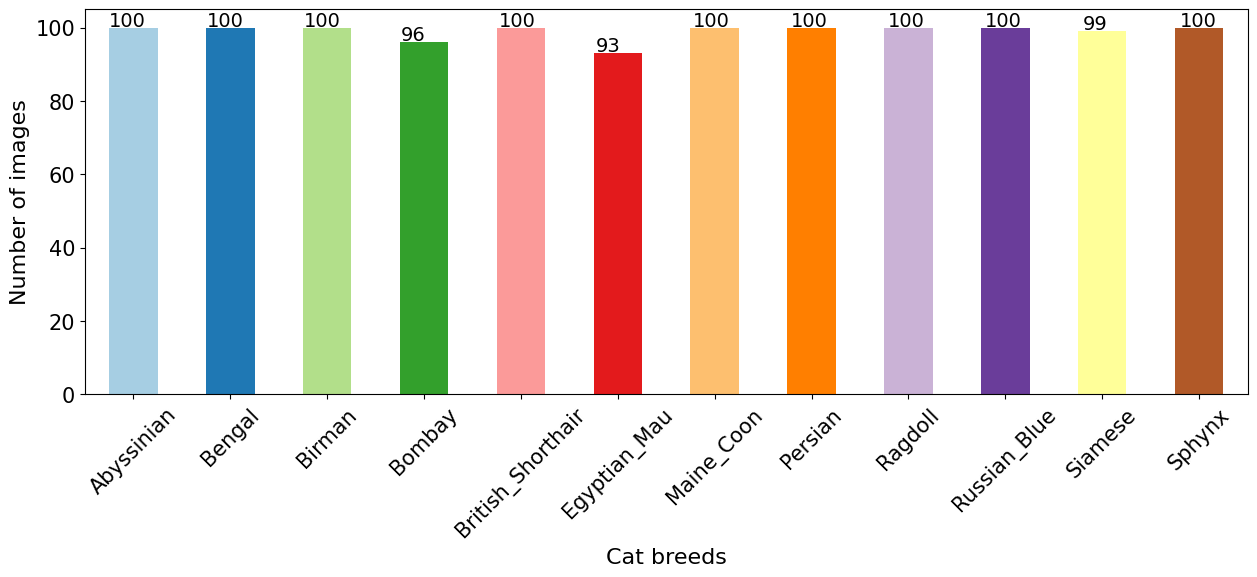

In [10]:
fig, ax = plt.subplots()

train_df['breed'].value_counts().loc[list(range(1,13))].plot(kind="bar", ax=ax, figsize=(15,5), color=plt.cm.Paired(np.arange(len(train_df))))

ax.set_xticklabels(list(breeds.values()), rotation=45)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Cat breeds', fontsize=16)
ax.set_ylabel('Number of images', fontsize=16)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),size=14)

#### Load list of testing data

In [11]:
test_df = pd.read_csv('data/annotations/test.txt', header=None, sep=' ')
test_df = test_df.iloc[(test_df.iloc[:,2] == 1).values,[0,3]] # filter only cat with file_name and breed columns
test_df = test_df.rename(columns={0 : 'file_name', 3:'breed'})
test_df['breed_name'] = test_df['breed'].map(breeds)
test_df.drop_duplicates(keep=False,inplace=True) # drop duplicates if any

print(len(test_df))
test_df.head(5)

1183


,file_name,breed,breed_name
0,Abyssinian_201,1,Abyssinian
1,Abyssinian_202,1,Abyssinian
2,Abyssinian_204,1,Abyssinian
3,Abyssinian_205,1,Abyssinian
4,Abyssinian_206,1,Abyssinian


### Class distribution of testing data

Look into the class distribution to see how balanced or unbalanced the data is.

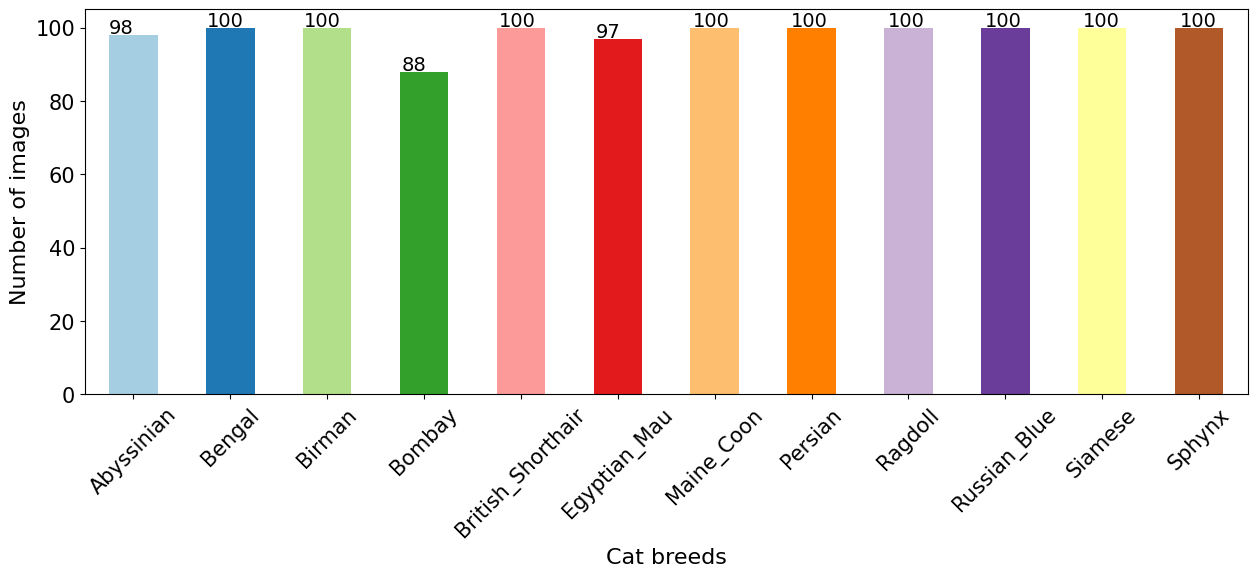

In [12]:
fig, ax = plt.subplots()

test_df['breed'].value_counts().loc[list(range(1,13))].plot(kind="bar", ax=ax, figsize=(15,5), color=plt.cm.Paired(np.arange(len(test_df))))

ax.set_xticklabels(list(breeds.values()), rotation=45)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Cat breeds', fontsize=16)
ax.set_ylabel('Number of images', fontsize=16)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),size=14)

### Split into training and testing data

The images are splitted into 'train' and 'test' folders based on the provided metadata.

#### Create the folders

In [13]:
!mkdir data/train
!mkdir data/test

#### Move the images to the respective folders

In [14]:
def move_images(source, destination, df):
    for index, row in df.iterrows():
        source_path = source+row['file_name']+'.jpg'
        destination_path = destination+row['breed_name']
        if not os.path.exists(destination_path):
            os.makedirs(destination_path)
        try:
            shutil.move(source_path,destination_path)
        except Exception as e:
            print('error :',e)


move_images('data/images/','data/train/',train_df)
move_images('data/images/','data/test/',test_df)

Just to make sure all the images have been moved, check count of images in both of the training and testing folder:

In [15]:
!ls data/train/*/* | wc -l
!ls data/test/*/* | wc -l


1188
1183


FYI, there are some images remaining which are not used either for training and testing. We will ignore the images as it is expected (the images were also not used on the previous study in a paper entitled "Cats and Dogs").

In [16]:
# unused images
!ls data/images/* | wc -l

29


## Set the random seed for reproducibility

In [17]:
def seed_torch(seed=1029):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

seed_torch(42)

## Set device to GPU if available

Warning: this notebook was executed & tested using GPU. So please make sure the GPU is available to avoid unexpected error.

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Utils functions

The functions which are used across model building and evaluation.

In [19]:
def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k

    source: https://github.com/pytorch/examples/blob/master/imagenet/main.py"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

def save_model_state(model, path):
    torch.save(model.state_dict(), path)

def load_model_state(model, path):
    model.load_state_dict(torch.load(path))
    model = model.to(device)
    return model

def get_cv_result_per_epoch(history):
    """Computes the accuracy & loss of cross validation per epoch"""
    cv_results = []

    for i,history_per_fold in enumerate(history):
        cv_result_per_epoch = []
        for j in range(len(history_per_fold[0])):
            cv_train_acc = 0.0
            cv_train_loss = 0.0
            cv_valid_acc = 0.0
            cv_valid_loss = 0.0
            cv_train_data_size = 0
            cv_valid_data_size = 0

            for k,history_per_epoch in enumerate(history_per_fold):
                cv_train_acc += history_per_epoch[j]['avg_train_acc']*history_per_epoch[j]['train_data_size']
                cv_train_loss += history_per_epoch[j]['avg_train_loss']*history_per_epoch[j]['train_data_size']
                cv_valid_acc += history_per_epoch[j]['avg_valid_acc']*history_per_epoch[j]['valid_data_size']
                cv_valid_loss += history_per_epoch[j]['avg_valid_loss']*history_per_epoch[j]['valid_data_size']
                cv_train_data_size += history_per_epoch[j]['train_data_size']
                cv_valid_data_size += history_per_epoch[j]['valid_data_size']

            cv_result_per_epoch.append({
                'params' : history_per_epoch[0]['params'],
                'epoch' : j+1,
                'cv_train_acc' : cv_train_acc/float(cv_train_data_size),
                'cv_train_loss' : cv_train_loss/float(cv_train_data_size),
                'cv_valid_acc' : cv_valid_acc/float(cv_valid_data_size),
                'cv_valid_loss' : cv_valid_loss/float(cv_valid_data_size)
            })
        cv_results.append(cv_result_per_epoch)

    return cv_results

def get_best_cv_result(cv_history):
    """Return the best cross validation result with respect to the validation loss."""

    # generate cross validation results per epoch
    cv_results = get_cv_result_per_epoch(cv_history)

    best_cv_result = {}
    for cv_result_per_epoch in cv_results:
        for cv_result in cv_result_per_epoch:
            if not best_cv_result or cv_result['cv_valid_loss'] < best_cv_result['cv_valid_loss']:
                best_cv_result = cv_result

    return best_cv_result


def plot_cv_result(cv_history):
    """Plot the cross validation accuracy and loss for each of the tuned hyperparameters".
    It is necessary to update this function if the number of hyperparameter combinations
    being tuned are not equal to 4"""

    # TODO make this function more dynamic wrt the number of hyperparameter combinations

    # generate cross validation results per epoch
    cv_results = get_cv_result_per_epoch(cv_history)

    plot_params = []
    plot_valid_loss = []
    plot_valid_acc = []

    for cv_result in cv_results:
        plot_params.append(cv_result[0]['params'])
        plot_valid_loss.append([val['cv_valid_loss'] for val in cv_result ])
        plot_valid_acc.append([val['cv_valid_acc'] for val in cv_result ])

    x = np.arange(1,len(plot_valid_loss[0])+1)

    print('\n------------ Validation loss per epoch ------------')

    for i in range(len(plot_valid_loss)):
        plt.plot(x,plot_valid_loss[i],label=plot_params[i])
    plt.legend(loc="upper right")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

    fig, ax = plt.subplots(2, 2,figsize=(15,9))

    ax[0,0].plot(x,plot_valid_loss[0],label=plot_params[0])
    ax[0,0].plot(x,plot_valid_loss[1],label=plot_params[1])
    ax[0,0].legend(loc="upper right")
    ax[0,0].set_ylabel('loss')
    ax[0,0].set_xlabel('epochs')

    ax[0,1].plot(x,plot_valid_loss[2],label=plot_params[2])
    ax[0,1].plot(x,plot_valid_loss[3],label=plot_params[3])
    ax[0,1].legend(loc="upper right")
    ax[0,1].set_ylabel('loss')
    ax[0,1].set_xlabel('epochs')

    ax[1,0].plot(x,plot_valid_loss[0],label=plot_params[0])
    ax[1,0].plot(x,plot_valid_loss[2],label=plot_params[2])
    ax[1,0].legend(loc="upper right")
    ax[1,0].set_ylabel('loss')
    ax[1,0].set_xlabel('epochs')

    ax[1,1].plot(x,plot_valid_loss[1],label=plot_params[1])
    ax[1,1].plot(x,plot_valid_loss[3],label=plot_params[3])
    ax[1,1].legend(loc="upper right")
    ax[1,1].set_ylabel('loss')
    ax[1,1].set_xlabel('epochs')

    plt.show()

    print('\n------------ Validation accuracy per epoch at ------------')

    for i in range(len(plot_valid_acc)):
        plt.plot(x,plot_valid_acc[i],label=plot_params[i])
    plt.legend(loc="lower right")
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

    fig, ax = plt.subplots(2, 2,figsize=(15,9))

    ax[0,0].plot(x,plot_valid_acc[0],label=plot_params[0])
    ax[0,0].plot(x,plot_valid_acc[1],label=plot_params[1])
    ax[0,0].legend(loc="lower right")
    ax[0,0].set_ylabel('accuracy')
    ax[0,0].set_xlabel('epochs')

    ax[0,1].plot(x,plot_valid_acc[2],label=plot_params[2])
    ax[0,1].plot(x,plot_valid_acc[3],label=plot_params[3])
    ax[0,1].legend(loc="lower right")
    ax[0,1].set_ylabel('accuracy')
    ax[0,1].set_xlabel('epochs')

    ax[1,0].plot(x,plot_valid_acc[0],label=plot_params[0])
    ax[1,0].plot(x,plot_valid_acc[2],label=plot_params[2])
    ax[1,0].legend(loc="lower right")
    ax[1,0].set_ylabel('accuracy')
    ax[1,0].set_xlabel('epochs')

    ax[1,1].plot(x,plot_valid_acc[1],label=plot_params[1])
    ax[1,1].plot(x,plot_valid_acc[3],label=plot_params[3])
    ax[1,1].legend(loc="lower right")
    ax[1,1].set_ylabel('accuracy')
    ax[1,1].set_xlabel('epochs')

    plt.show()

def plot_train_result(train_history):
    """Plot the training loss and the training accuracy of the retrained model"""
    plot_params = []
    plot_train_loss = []
    plot_train_acc = []

    x = np.arange(1, len(train_history)+1)

    for hist in train_history:
        plot_train_loss.append(hist['avg_train_loss'])
        plot_train_acc.append(hist['avg_train_acc']*100)

    plt.plot(x,plot_train_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Training loss')
    plt.show()

    plt.plot(x,plot_train_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Training accuracy')
    plt.show()

## Load and transform images

Load the images, and transform the images in order to use pretrained model for transfer learning.

In [20]:
# the expected normalization by the pretrained model
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# transforms for the images (without augmentation)
# here, both train and test have the same transformation
image_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        normalize
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        normalize
    ])
}

# transforms with augmentation on the training data
augmented_image_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        normalize
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        normalize
    ])
}

# train and test directory paths
train_directory = 'data/train'
test_directory = 'data/test'

# load data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory), # transforms applied in the cross validation later
    'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
}

# mapping class index to class name
idx_to_class = {val: key for key, val in data['test'].class_to_idx.items()}

# needed for StratifiedKFold
train_images = [d[0] for d in tqdm_notebook(data['train'], desc='train_images')]
train_labels = [d[1] for d in tqdm_notebook(data['train'], desc='train_labels')]

### Visualize sample of transformed image

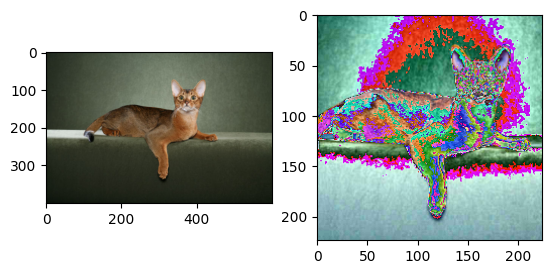

In [21]:
# resized, cropped, normalized image

to_pil = torchvision.transforms.ToPILImage()

ori_img = data['train'][0][0]
trans_img = to_pil(image_transforms['train'](ori_img))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(ori_img)
axarr[1].imshow(trans_img)

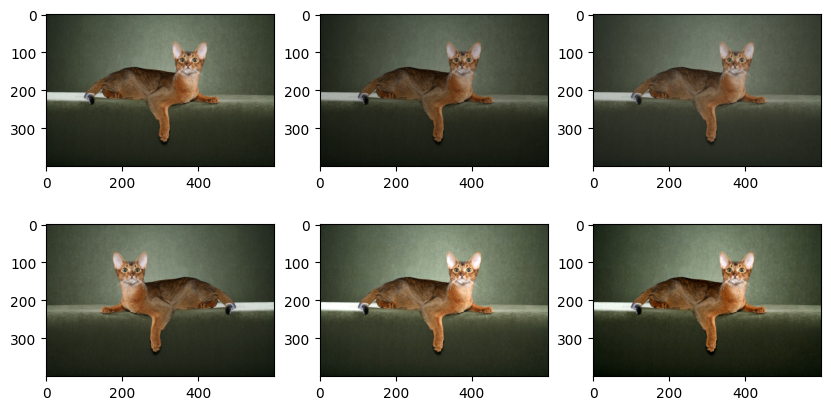

In [22]:
# flipped, modified brightness, modified contrast

horizontal_flip = transforms.RandomHorizontalFlip(p=1)
darken = transforms.ColorJitter(brightness=(0.8,0.8))
brighten = transforms.ColorJitter(brightness=(1.2,1.2))
dec_contrast = transforms.ColorJitter(contrast=(0.8,0.8)) # decrease contrast
inc_contrast = transforms.ColorJitter(contrast=(1.2,1.2)) # increase contrast

ori_img = data['train'][0][0]
flip_img = horizontal_flip(ori_img)
dark_img = darken(ori_img)
bright_img = brighten(ori_img)
dec_con_img = dec_contrast(ori_img)
inc_con_img = inc_contrast(ori_img)

f, axarr = plt.subplots(2,3, figsize=(10,5))
axarr[0,0].imshow(ori_img)
axarr[0,1].imshow(dark_img)
axarr[0,2].imshow(dec_con_img)
axarr[1,0].imshow(flip_img)
axarr[1,1].imshow(bright_img)
axarr[1,2].imshow(inc_con_img)

## Grid Search & Cross Validation function

In [23]:
def grid_search_cv(model, k_fold=5, epochs=10, hyperparameters={'batch_size':[32,64],'learning_rate' : [1e-03, 1e-04]},transforms=image_transforms):
    """Performs hyperparameter tuning with grid search, and evaluates the models using cross validation"""

    # split the data into k folds, for cross validation
    kFold = StratifiedKFold(n_splits = k_fold, shuffle = True, random_state = 42)

    # for grid search
    param_grid = ParameterGrid(hyperparameters)

    # loss function
    loss_criterion = nn.NLLLoss()

    # to store the results for plotting
    history_per_param = []

    for i_params, params in enumerate(param_grid):
        hyperparameter_start = time.time()

        bs = params['batch_size']
        lr = params['learning_rate']
        print('Hyperparameters {}/{} > bs: {} - lr: {}'.format(i_params+1, len(list(param_grid)), bs, lr))

        cv_train_loss = 0.0
        cv_valid_loss = 0.0
        cv_train_acc = 0.0
        cv_valid_acc = 0.0

        history_per_fold = []

        for i_fold, (train_idx, valid_idx) in enumerate(kFold.split(train_images, train_labels)):
            fold_start = time.time()

            # reset the state of the model
            model.load_state_dict(init_state)

            # recreate the Adam optimizer
            optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad,model.parameters()), lr=lr)

            train_data_size = len(train_idx)
            valid_data_size = len(valid_idx)

            print('Fold {}/{} > training data size: {} - validation data size: {}'.format(i_fold+1,k_fold,train_data_size,valid_data_size))

            # apply the transforms, and create list of tuple image and label
            train_ds = [(transforms['train'](train_images[i]), train_labels[i]) for i in train_idx]
            valid_ds = [(transforms['test'](train_images[i]), train_labels[i]) for i in valid_idx]

            # data loader for mini-batch iteration
            train_data_loader = torch.utils.data.DataLoader(train_ds, batch_size=bs, shuffle=True)
            valid_data_loader = torch.utils.data.DataLoader(valid_ds, batch_size=bs, shuffle=True)

            history_per_epoch = []

            for epoch in range(epochs):
                epoch_start = time.time()
                print("\nEpoch {}/{}".format(epoch+1, epochs))

                # set to training mode
                model.train()

                # loss and accuracy within the epoch
                train_loss = 0.0
                train_acc = 0.0
                valid_loss = 0.0
                valid_acc = 0.0

                for i, (inputs, labels) in enumerate(train_data_loader):

                    # put inputs and labels to GPU if available
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # clean existing gradients
                    optimizer.zero_grad()

                    # forward pass
                    outputs = model(inputs)

                    # compute loss
                    loss = loss_criterion(outputs, labels)

                    # backpropagate the gradients
                    loss.backward()

                    # update the parameters
                    optimizer.step()

                    # compute the total loss in the batch, and add to train_loss
                    train_loss += loss.item() * inputs.size(0)

                    # compute the accuracy
                    ret, predictions = torch.max(outputs.data, 1)
                    correct_counts = predictions.eq(labels.data.view_as(predictions))
                    acc = torch.mean(correct_counts.type(torch.FloatTensor))

                    # compute total accuracy in the batch and add to train_acc
                    train_acc += acc.item() * inputs.size(0)

                    print("Training Batch {:03d} > loss: {} - acc: {}".format(i, loss.item(), acc.item()))

                # validation
                with torch.no_grad():

                    # set to evaluation mode
                    model.eval()

                    for j, (inputs, labels) in enumerate(valid_data_loader):

                        # put inputs and labels to GPU if available
                        inputs = inputs.to(device)
                        labels = labels.to(device)

                        # forward pass
                        outputs = model(inputs)

                        # compute loss
                        loss = loss_criterion(outputs, labels)

                        # compute the total loss in the batch, and add to valid_loss
                        valid_loss += loss.item() * inputs.size(0)

                        # calculate validation accuracy
                        ret, predictions = torch.max(outputs.data, 1)
                        correct_counts = predictions.eq(labels.data.view_as(predictions))
                        acc = torch.mean(correct_counts.type(torch.FloatTensor))

                        # compute total accuracy in the batch and add valid_acc
                        valid_acc += acc.item() * inputs.size(0)

                        print("Validation Batch {:03d} > valid_loss: {}, valid_acc: {}".format(j, loss.item(), acc.item()))

                # compute average training loss and training accuracy
                avg_train_loss = train_loss/float(train_data_size)
                avg_train_acc = train_acc/float(train_data_size)

                # compute average training loss and training accuracy
                avg_valid_loss = valid_loss/float(valid_data_size)
                avg_valid_acc = valid_acc/float(valid_data_size)

                history_per_epoch.append({
                                'params' : params,
                                'avg_train_loss': avg_train_loss,
                                'avg_valid_loss': avg_valid_loss,
                                'avg_train_acc': avg_train_acc,
                                'avg_valid_acc':avg_valid_acc,
                                'train_data_size':train_data_size,
                                'valid_data_size':valid_data_size
                                })

                epoch_end = time.time()

                print("End Epoch {}/{} > loss: {} - acc: {}% - valid_loss: {} - valid_acc: {}% - Time: {:.4f}s".format(epoch+1, epochs, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

            history_per_fold.append(history_per_epoch)

            cv_train_loss += avg_train_loss
            cv_valid_loss += avg_valid_loss
            cv_train_acc += avg_train_acc
            cv_valid_acc += avg_valid_acc

            fold_end = time.time()
            print("End Fold {}/{} > time: {:.4f}s\n".format(i_fold+1, k_fold, fold_end - fold_start))

        history_per_param.append(history_per_fold)

        hyperparameter_end = time.time()

        print('End Hyperparameters {}/{} > bs: {} - lr: {} - time: {:.4f}s'.format(i_params+1, len(list(param_grid)), bs, lr, hyperparameter_end - hyperparameter_start))
        print('                       > loss: {} - acc: {}% - valid_loss: {} - valid_acc: {}% - Time: {:.4f}s\n'.format(cv_train_loss/k_fold, (cv_train_acc/k_fold)*100, cv_valid_loss/k_fold, (cv_valid_acc/k_fold)*100, hyperparameter_end-hyperparameter_start))
    return history_per_param

## Train function

In [24]:
def train(model, epochs, bs=32, lr=0.001,init_state=None, transforms=image_transforms):
    ''' train the model on the full training data with the best param'''

    # set the state of the model if defined
    if init_state is not None:
        model.load_state_dict(init_state)

    # adam optimizer
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad,model.parameters()), lr=lr)

    # loss function
    loss_criterion = nn.NLLLoss()

    # transform the train images
    train_ds_transformed = datasets.ImageFolder(root=train_directory, transform=transforms['train'])
    train_data_size = len(train_ds_transformed)

    print('Training > training data size: {}'.format(train_data_size))

    # data loader for mini batch iteration
    train_data_loader = torch.utils.data.DataLoader(train_ds_transformed, batch_size=bs, shuffle=True)

    train_start = time.time()

    history_per_epoch = []

    for epoch in range(epochs):
        epoch_start = time.time()

        print("\nEpoch {}/{}".format(epoch+1, epochs))

        # set to training mode
        model.train()

        # loss and accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        for i, (inputs, labels) in enumerate(tqdm_notebook(train_data_loader,desc='Training')):

            # put the inputs and labels to GPU if available
            inputs = inputs.to(device)
            labels = labels.to(device)

            # clean existing gradients
            optimizer.zero_grad()

            # forward pass
            outputs = model(inputs)

            # compute loss
            loss = loss_criterion(outputs, labels)

            # backpropagate the gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # compute the total loss in the batch, and add to train_loss
            train_loss += loss.item() * inputs.size(0)

            # compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # compute total accuracy in the batch, and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # compute average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/float(train_data_size)

        history_per_epoch.append({
                        'avg_train_loss': avg_train_loss,
                        'avg_train_acc': avg_train_acc
                        })

        epoch_end = time.time()

        print("End Epoch {}/{} > loss: {:.4f} - acc: {:.4f}% - Time: {:.4f}s".format(epoch+1, epochs, avg_train_loss, avg_train_acc*100, epoch_end-epoch_start))

    train_end = time.time()
    print("End Train > time: {:.4f}s\n".format(train_end - train_start))
    return (model,history_per_epoch)

## Test function

In [25]:
def test(model, calc_top3_acc=False):
    """evaluate the model and return some metrics. set calc_top3_acc to True to compute the top 3 acc"""
    test_data_size = len(data['test'])
    print('Test data size :', test_data_size,'\n')

    # data loader for mini-batch iteration
    test_data_loader = torch.utils.data.DataLoader(data['test'], batch_size=32, shuffle=True)

    # loss function
    loss_criterion = nn.NLLLoss()

    test_start = time.time()
    with torch.no_grad():

        # set to evaluation mode
        model.eval()

        test_loss = 0.0
        test_acc = 0.0
        test_top3_acc = 0.0

        # for generating confusion matrix
        all_labels = []
        all_predictions = []

        for j, (inputs, labels) in enumerate(tqdm_notebook(test_data_loader,  desc='Testing', file=sys.stdout)):
            # put the inputs and labels to GPU if available
            inputs = inputs.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(inputs)

            # compute loss
            loss = loss_criterion(outputs, labels)

            # compute the total loss in the batch, and add to test_loss
            test_loss += loss.item() * inputs.size(0)

            # calculate test accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # compute total accuracy in the batch, and add to test_acc
            test_acc += acc.item() * inputs.size(0)

            # store the labels and predictions
            all_labels.extend(labels.tolist())
            all_predictions.extend(predictions.tolist())

            if calc_top3_acc:
                top3_acc= accuracy(outputs, labels, topk=(3,))
                test_top3_acc += top3_acc[0][0].item() * inputs.size(0)


    # compute average loss and accuracy
    avg_test_loss = test_loss/test_data_size
    avg_test_acc = test_acc/float(test_data_size)

    # compute average top 3 accuracy
    avg_test_top3_acc = 0.0
    if calc_top3_acc:
        avg_test_top3_acc= test_top3_acc/float(test_data_size)

    # generate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions, labels=list(data['test'].class_to_idx.values()))

    test_end = time.time()
    print('\nResult > loss: {:.4f} - acc: {:.4f}% - time: {:.4f}s\n'.format(avg_test_loss, avg_test_acc*100, test_end - test_start))

    if calc_top3_acc:
        print('\nResult > top3_acc: {:.4f}% \n'.format(avg_test_top3_acc))

    return (avg_test_loss, avg_test_acc, cm, avg_test_top3_acc)

## Simple CNN (without transfer Learning)

### Build the network

In [26]:
class Flatten(torch.nn.Module):
    '''to flatten convolutional layer outputs'''
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)

# build the simple CNN
simpleCNN = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    Flatten(),
    nn.Dropout(p=0.5),
    nn.Linear(64*112*112, 12),
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# move the model to a device
simpleCNN = simpleCNN.to(device)

# copy initial state, used for retraining later
init_state = copy.deepcopy(simpleCNN.state_dict())

### Perfom grid search & cross validation

In [ ]:
cv_history = grid_search_cv(simpleCNN, k_fold=5, epochs=50, hyperparameters={'batch_size':[32,64],'learning_rate' : [1e-03, 1e-04]})

Hyperparameters 1/4 > bs: 32 - lr: 0.001
Fold 1/5 > training data size: 950 - validation data size: 238

Epoch 1/50
Training Batch 000 > loss: 2.54156231880188 - acc: 0.0625
Training Batch 001 > loss: 126.5736312866211 - acc: 0.09375
Training Batch 002 > loss: 140.80711364746094 - acc: 0.125
Training Batch 003 > loss: 175.09788513183594 - acc: 0.03125
Training Batch 004 > loss: 124.56013488769531 - acc: 0.1875
Training Batch 005 > loss: 96.55265808105469 - acc: 0.15625
Training Batch 006 > loss: 108.63108825683594 - acc: 0.125
Training Batch 007 > loss: 80.22926330566406 - acc: 0.21875
Training Batch 008 > loss: 92.43963623046875 - acc: 0.09375
Training Batch 009 > loss: 122.44219970703125 - acc: 0.1875
Training Batch 010 > loss: 159.6352996826172 - acc: 0.09375
Training Batch 011 > loss: 114.85741424560547 - acc: 0.03125
Training Batch 012 > loss: 93.4229736328125 - acc: 0.125
Training Batch 013 > loss: 59.783782958984375 - acc: 0.15625
Training Batch 014 > loss: 71.12592315673828 - a

###  Result of grid search & cross validation

In [ ]:
# get the best cross validation result
best_cv_result = get_best_cv_result(cv_history)

print('\n------------ Best cross validation result ------------')
print(best_cv_result)

plot_cv_result(cv_history)

### Training on full training data

The final model is retrained on full training data using the best parameters.

In [ ]:
simpleCNN, train_history = train(simpleCNN, best_cv_result['epoch'],
                             best_cv_result['params']['batch_size'],
                             best_cv_result['params']['learning_rate'],
                             init_state)

### Result of training

In [ ]:
print('loss :',train_history[-1]['avg_train_loss'])
print('acc :',train_history[-1]['avg_train_acc']*100)

plot_train_result(train_history)

### Testing

In [ ]:
results = test(simpleCNN, calc_top3_acc=True)
loss = results[0]
acc = results[1]
cm = results[2]
top3_acc = results[3]

### Result of testing

In [ ]:
recall = cm.diagonal()/cm.sum(axis=1)
precision = cm.diagonal()/cm.sum(axis=0)
fscore = 2*precision*recall/(precision+recall)

print('loss :', loss)
print('acc :',acc*100)
print('average fscore:',np.average(fscore)*100)
print('top3 acc :',top3_acc)

print('\n------------ Confusion Matrix ------------')

df_cm = pd.DataFrame(cm, index = data['test'].class_to_idx.keys(),
                  columns = data['test'].class_to_idx.keys())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

print('\n------------ FScore per class ------------')

pd.DataFrame(fscore,index = data['test'].class_to_idx.keys(),columns=['fscore'])

### Save the model

In [ ]:
!mkdir model
save_model_state(simpleCNN, 'model/simpleCNN-model.pth')

## ResNet-50 (Pretrained)

### Build the network

In [ ]:
resnet50 = torchvision.models.resnet50(pretrained=True)

# freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

# change the final layer of ResNet50 model for transfer learning
fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 12),
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)
# move the model to a device
resnet50 = resnet50.to(device)

# copy initial state, used for retraining later
init_state = copy.deepcopy(resnet50.state_dict())

### Perform grid search & cross validation

In [ ]:
cv_history = grid_search_cv(resnet50, k_fold=5, epochs=50, hyperparameters={'batch_size':[32,64],'learning_rate' : [1e-03, 1e-04]})

###  Result of grid search & cross validation

In [ ]:
# get the best cross validation result
best_cv_result = get_best_cv_result(cv_history)

print('\n------------ Best cross validation result ------------')
print(best_cv_result)

plot_cv_result(cv_history)

### Training on full training data

The final model is retrained on full training data using the best parameters.

In [ ]:
resnet50, train_history = train(resnet50, best_cv_result['epoch'],
                             best_cv_result['params']['batch_size'],
                             best_cv_result['params']['learning_rate'],
                             init_state)

### Result of training

In [ ]:
print('loss :',train_history[-1]['avg_train_loss'])
print('acc :',train_history[-1]['avg_train_acc']*100)

plot_train_result(train_history)

### Testing

In [ ]:
results = test(resnet50, calc_top3_acc=True)
loss = results[0]
acc = results[1]
cm = results[2]
top3_acc = results[3]

### Result of testing

In [ ]:
recall = cm.diagonal()/cm.sum(axis=1)
precision = cm.diagonal()/cm.sum(axis=0)
fscore = 2*precision*recall/(precision+recall)

print('loss :', loss)
print('acc :',acc*100)
print('average fscore:',np.average(fscore)*100)
print('top3 acc :',top3_acc)

print('\n------------ Confusion Matrix ------------')

df_cm = pd.DataFrame(cm, index = data['test'].class_to_idx.keys(),
                  columns = data['test'].class_to_idx.keys())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

print('\n------------ FScore per class ------------')

pd.DataFrame(fscore,index = data['test'].class_to_idx.keys(),columns=['fscore'])

### Save the model

In [ ]:
!mkdir model
save_model_state(resnet50, 'model/resnet50-model.pth')

## ResNet-50 with image augmentation

### Build the network

In [ ]:
resnet50 = None

resnet50 = torchvision.models.resnet50(pretrained=True)

# freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

# change the final layer of ResNet50 model for transfer learning
fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 12),
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)
# move the model to a device
resnet50 = resnet50.to(device)

# copy initial state, used for retraining later
init_state = copy.deepcopy(resnet50.state_dict())

### Perform grid search & cross validation

In [ ]:
cv_history = grid_search_cv(resnet50, k_fold=5, epochs=50, hyperparameters={'batch_size':[32,64],'learning_rate' : [1e-03, 1e-04]}, transforms=augmented_image_transforms)

### Result of grid seach & cross validation

In [ ]:
# get the best cross validation result
best_cv_result = get_best_cv_result(cv_history)

print('\n------------ Best cross validation result ------------')
print(best_cv_result)

plot_cv_result(cv_history)

### Training on full training data

The final model is retrained on full training data using the best parameters.

In [ ]:
resnet50, train_history = train(resnet50, best_cv_result['epoch'],
                             best_cv_result['params']['batch_size'],
                             best_cv_result['params']['learning_rate'],
                             init_state,
                             transforms=augmented_image_transforms)

### Result of training

In [ ]:
print('loss :',train_history[-1]['avg_train_loss'])
print('acc :',train_history[-1]['avg_train_acc']*100)

plot_train_result(train_history)

### Testing

In [ ]:
results = test(resnet50, calc_top3_acc=True)
loss = results[0]
acc = results[1]
cm = results[2]
top3_acc = results[3]

### Result of testing

In [ ]:
recall = cm.diagonal()/cm.sum(axis=1)
precision = cm.diagonal()/cm.sum(axis=0)
fscore = 2*precision*recall/(precision+recall)

print('loss :', loss)
print('acc :',acc*100)
print('average fscore:',np.average(fscore)*100)
print('top3 acc :',top3_acc)

print('\n------------ Confusion Matrix ------------')

df_cm = pd.DataFrame(cm, index = data['test'].class_to_idx.keys(),
                  columns = data['test'].class_to_idx.keys())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

print('\n------------ FScore per class ------------')

pd.DataFrame(fscore,index = data['test'].class_to_idx.keys(),columns=['fscore'])

### Save the model

In [ ]:
!mkdir model
save_model_state(resnet50, 'model/resnet50-model-augmentation.pth')

## Visualize some predictions

### Load the saved model for inference

Here, the resnet50 with augmentation data will be used for the inference.

In [ ]:
# get the pretrained resnet50
resnet50 = torchvision.models.resnet50(pretrained=True)

# freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

# change the final layer of ResNet50 model for transfer learning
fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 12),
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# load the model state
resnet50 = load_model_state(resnet50, 'model/resnet50-model-augmentation.pth')

### Prediction function

In [ ]:
def predict(model, img, k, actual_label):
    ''' display an image along with the top k predictions'''
    predict_image = None
    try:
        img.verify() # verify img is an image (not string of path)
        predict_image = img
    except Exception:
        predict_image = Image.open(img)

    # open and transform the image
    transform = image_transforms['test']

    predict_image_tensor = transform(predict_image)
    predict_image_tensor = predict_image_tensor.view(1, 3, 224, 224)
    predict_image_tensor = predict_image_tensor.to(device)

    with torch.no_grad():

        model.eval()
        out = model(predict_image_tensor)
        ps = torch.exp(out)

        # get the topk result
        topprob, topclass = ps.topk(k, dim=1)
        topprob_np = topprob.cpu().numpy()[0]
        topclass_np = topclass.cpu().numpy()[0]

        # print the prediction result
        print('Actual :')
        print('-',actual_label,'\n')
        print('Top',k,'prediction :')
        for idx,prob in enumerate(topprob_np):
            print('-',idx_to_class[topclass_np[idx]],':',prob*100)

        # display the image
        plt.figure()
        plt.imshow(predict_image)
        plt.show()
        print('------------------------------------------------------')

### Visualize a correct prediction for each breed

In [ ]:
predict(resnet50, 'data/test/Abyssinian/Abyssinian_2.jpg', k=3, actual_label='Abyssinian')
predict(resnet50, 'data/test/Bengal/Bengal_46.jpg', k=3, actual_label='Bengal')
predict(resnet50, 'data/test/Birman/Birman_29.jpg', k=3, actual_label='Birman')
predict(resnet50, 'data/test/Bombay/Bombay_47.jpg', k=3, actual_label='Bombay')
predict(resnet50, 'data/test/British_Shorthair/British_Shorthair_37.jpg', k=3, actual_label='British_Shorthair')
predict(resnet50, 'data/test/Egyptian_Mau/Egyptian_Mau_62.jpg', k=3, actual_label='Egyptian_Mau')
predict(resnet50, 'data/test/Maine_Coon/Maine_Coon_52.jpg', k=3, actual_label='Maine_Coon')
predict(resnet50, 'data/test/Persian/Persian_63.jpg', k=3, actual_label='Persian')
predict(resnet50, 'data/test/Ragdoll/Ragdoll_205.jpg', k=3, actual_label='Ragdoll')
predict(resnet50, 'data/test/Russian_Blue/Russian_Blue_57.jpg', k=3, actual_label='Russian_Blue')
predict(resnet50, 'data/test/Siamese/Siamese_78.jpg', k=3, actual_label='Siamese')
predict(resnet50, 'data/test/Sphynx/Sphynx_95.jpg', k=3, actual_label='Sphynx')

### Visualize the misclassified predictions

#### Top 3 misclassified predictions


In [ ]:
idx_to_class = {val: key for key, val in data['test'].class_to_idx.items()}

misclass = []
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i!=j:
            misclass.append([idx_to_class[i],idx_to_class[j], cm[i][j]])

df_misclass = pd.DataFrame(misclass,columns=['actual','prediction','count'])
df_misclass = df_misclass.sort_values(by=['count'], ascending=False)
df_misclass.head(3)

#### Visualize the top 3 misclassified predictions

Here, we want to see the top misclassied images, such as Ragdoll predicted as Birman, British Shorthair predicted as Russian Blue, Egyptian Mau predicted as Bengal, and vice versa.

In [ ]:
predict(resnet50, 'data/test/Birman/Birman_99.jpg', k=3, actual_label='Birman')
predict(resnet50, 'data/test/Ragdoll/Ragdoll_35.jpg', k=3, actual_label='Ragdoll')
predict(resnet50, 'data/test/British_Shorthair/British_Shorthair_28.jpg', k=3, actual_label='British_Shorthair')
predict(resnet50, 'data/test/Russian_Blue/Russian_Blue_264.jpg', k=3, actual_label='Russian_Blue')
predict(resnet50, 'data/test/Egyptian_Mau/Egyptian_Mau_85.jpg', k=3, actual_label='Egyptian_Mau')
predict(resnet50, 'data/test/Bengal/Bengal_2.jpg', k=3, actual_label='Bengal')

In [ ]:
### Predicting transformed images

Here, we will try to transform an image which was correctly classfied, and try to predict the transformed images.

In [ ]:
to_pil = transforms.ToPILImage()
to_tensor = transforms.ToTensor()

horizontal_flip = transforms.RandomHorizontalFlip(p=1)
vertical_flip = transforms.RandomVerticalFlip(p=1)
darken = transforms.ColorJitter(brightness=(0.5,0.5))
brighten = transforms.ColorJitter(brightness=(1.5,1.5))
dec_contrast = transforms.ColorJitter(contrast=(0.5,0.5)) # decrease contrast
inc_contrast = transforms.ColorJitter(contrast=(1.5,1.5)) # increase contrast
noise = transforms.Lambda(lambda x: x + torch.randn_like(x)*0.01) # add noise
rotate = transforms.RandomRotation(30)

ori_img = Image.open('data/test/Bombay/Bombay_47.jpg')
h_flip_img = horizontal_flip(ori_img)
v_flip_img = vertical_flip(ori_img)
dark_img = darken(ori_img)
bright_img = brighten(ori_img)
dec_con_img = dec_contrast(ori_img)
inc_con_img = inc_contrast(ori_img)
noise_img = to_pil(noise(to_tensor(ori_img)))
rotated_img = rotate(ori_img)

all_transforms_img = vertical_flip(horizontal_flip(ori_img))
all_transforms_img = brighten(darken(all_transforms_img))
all_transforms_img = inc_contrast(dec_contrast(all_transforms_img))
all_transforms_img = to_pil(noise(to_tensor(all_transforms_img)))
all_transforms_img = rotate(all_transforms_img)

print('-----------------------Original-------------------------')
predict(resnet50, 'data/test/Bombay/Bombay_47.jpg', k=3, actual_label='Bombay')

print('------------------Horizontal Flip-------------------------')
predict(resnet50, h_flip_img, k=3, actual_label='Bombay')

print('------------------Vertical Flip-------------------------')
predict(resnet50, v_flip_img, k=3, actual_label='Bombay')

print('------------------Darker-------------------------')
predict(resnet50, dark_img, k=3, actual_label='Bombay')

print('------------------Brighter-------------------------')
predict(resnet50, bright_img, k=3, actual_label='Bombay')

print('------------------Lower Contrast-------------------------')
predict(resnet50, dec_con_img, k=3, actual_label='Bombay')

print('------------------Higher Contrast-------------------------')
predict(resnet50, inc_con_img, k=3, actual_label='Bombay')

print('------------------Add Noise-------------------------')
predict(resnet50, noise_img, k=3, actual_label='Bombay')

print('------------------Rotate-------------------------')
predict(resnet50, rotated_img, k=3, actual_label='Bombay')

print('------------------All Transforms -------------------------')
predict(resnet50, all_transforms_img, k=3, actual_label='Bombay')